In [38]:
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Caminho do banco de dados
db_path = r"C:\Users\rafae\Downloads\output\Cript-BTC-USD-Anlytics\SQL\yahoo_data.db"

# Conectar ao banco
conn = sqlite3.connect(db_path)

In [3]:
# Listar as tabelas
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print("Tabelas no banco:", tables)

Tabelas no banco: [('cryptocurrencies',), ('crypto_prices',)]


In [4]:
# Consulta SQL
query = """
SELECT symbol, COUNT(*) AS total_registros
FROM crypto_prices
GROUP BY symbol
ORDER BY total_registros DESC;
"""

# Executar e carregar em um DataFrame
df = pd.read_sql_query(query, conn)
df

,symbol,total_registros
0,BTC-USD,3745


In [5]:
## Consulta 1: Total de registros por criptomoeda

# Consulta SQL
query = """
SELECT symbol, COUNT(*) AS total_registros
FROM crypto_prices
GROUP BY symbol
ORDER BY total_registros DESC;
"""

# Executar e carregar em um DataFrame
df = pd.read_sql_query(query, conn)
df

,symbol,total_registros
0,BTC-USD,3745


In [6]:
## Consulta 2: Preço máximo, mínimo e médio de cada criptomoeda

query = """
SELECT 
    symbol,
    MAX(close_price) AS preco_maximo,
    MIN(close_price) AS preco_minimo,
    AVG(close_price) AS preco_medio
FROM crypto_prices
GROUP BY symbol
ORDER BY preco_maximo DESC;
"""

df = pd.read_sql_query(query, conn)
df

,symbol,preco_maximo,preco_minimo,preco_medio
0,BTC-USD,106140.601562,178.102997,19299.929092


In [7]:
## Consulta 3: Volume total negociado por criptomoeda

query = """
SELECT 
    symbol,
    SUM(volume) AS volume_total
FROM crypto_prices
GROUP BY symbol
ORDER BY volume_total DESC;
"""

df = pd.read_sql_query(query, conn)
df

,symbol,volume_total
0,BTC-USD,6.906271e+13


In [9]:
# Consulta 4: Histórico de preços para uma criptomoeda específica (BTC-USD)

query = """
SELECT 
    date,
    open_price,
    high_price,
    low_price,
    close_price,
    volume
FROM crypto_prices
WHERE symbol = 'BTC-USD'
ORDER BY date ASC;
"""

df = pd.read_sql_query(query, conn)
df.head(n=10)

,date,open_price,high_price,low_price,close_price,volume
0,2014-09-17 00:00:00.000000,465.864014,468.174011,452.421997,457.334015,21056800.0
1,2014-09-18 00:00:00.000000,456.859985,456.859985,413.104004,424.440002,34483200.0
2,2014-09-19 00:00:00.000000,424.102997,427.834991,384.532013,394.795990,37919700.0
3,2014-09-20 00:00:00.000000,394.673004,423.295990,389.882996,408.903992,36863600.0
4,2014-09-21 00:00:00.000000,408.084991,412.425995,393.181000,398.821014,26580100.0
5,2014-09-22 00:00:00.000000,399.100006,406.915985,397.130005,402.152008,24127600.0
6,2014-09-23 00:00:00.000000,402.092010,441.557007,396.196991,435.790985,45099500.0
7,2014-09-24 00:00:00.000000,435.751007,436.112000,421.131989,423.204987,30627700.0
8,2014-09-25 00:00:00.000000,423.156006,423.519989,409.467987,411.574005,26814400.0
9,2014-09-26 00:00:00.000000,411.428986,414.937988,400.009003,404.424988,21460800.0


In [12]:
## Consulta 5: Data com maior e menor preço para BTC-USD

query = """
SELECT 
    symbol,
    date,
    close_price
FROM crypto_prices
WHERE symbol = 'BTC-USD' AND (close_price = 
    (SELECT MAX(close_price) FROM crypto_prices WHERE symbol = 'BTC-USD')
    OR close_price = 
    (SELECT MIN(close_price) FROM crypto_prices WHERE symbol = 'BTC-USD'))
ORDER BY close_price DESC;
"""

df = pd.read_sql_query(query, conn)
df.head(n=2)

,symbol,date,close_price
0,BTC-USD,2024-12-17 00:00:00.000000,106140.601562
1,BTC-USD,2015-01-14 00:00:00.000000,178.102997


## **Análise dados - Análise série temporal**

In [14]:
# Carregar os dados da tabela crypto_prices
query = "SELECT * FROM crypto_prices WHERE symbol = 'BTC-USD';"
df = pd.read_sql_query(query, conn)

# Converter a coluna 'date' para formato datetime
df['date'] = pd.to_datetime(df['date'])

# Visualizar os primeiros registros
df.head()  

,id,symbol,date,open_price,high_price,low_price,close_price,volume
0,1,BTC-USD,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800.0
1,2,BTC-USD,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200.0
2,3,BTC-USD,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700.0
3,4,BTC-USD,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600.0
4,5,BTC-USD,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100.0


1. Gráfico de Linha: Preço de Fechamento ao Longo do Tempo

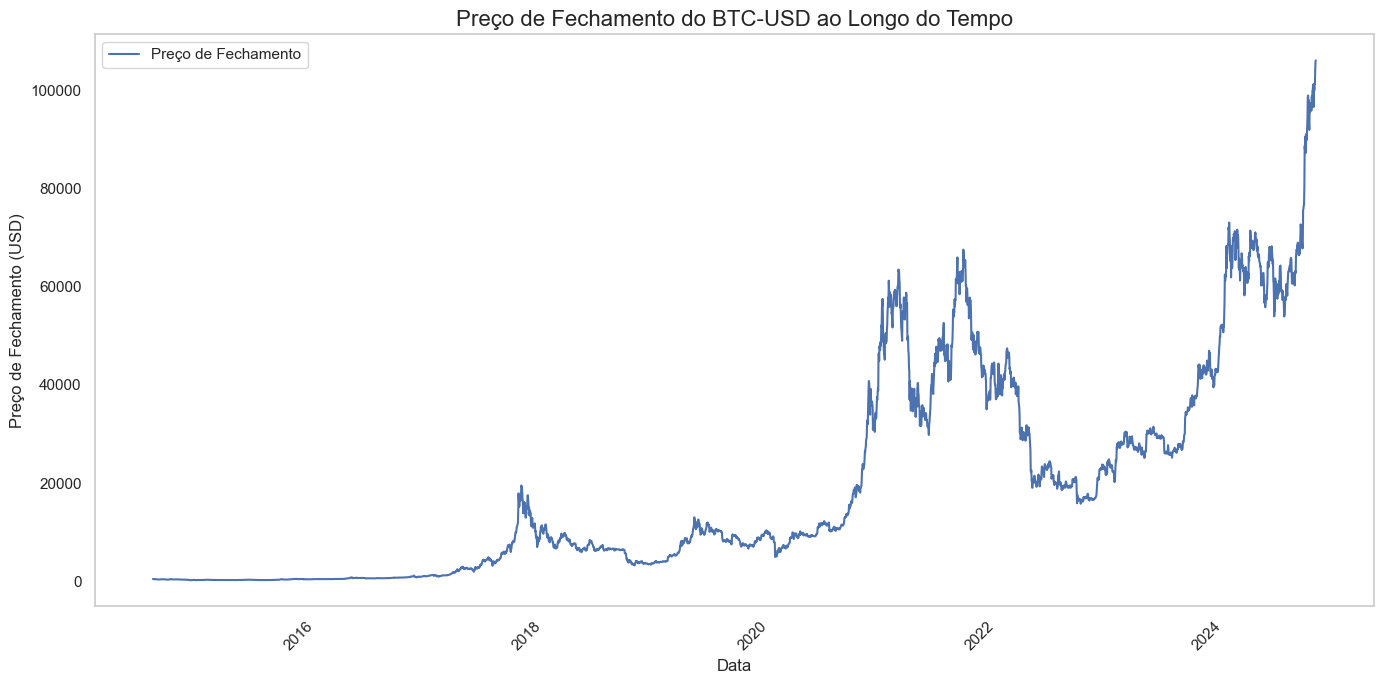

In [17]:
# Configurar o estilo do gráfico
sns.set(style="whitegrid")

# Criar o gráfico de linha
plt.figure(figsize=(14, 7))
sns.lineplot(x='date', y='close_price', data=df, label='Preço de Fechamento')

# Configurações do gráfico
plt.title('Preço de Fechamento do BTC-USD ao Longo do Tempo', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Preço de Fechamento (USD)', fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(False)

# Mostrar o gráfico
plt.show()

2. Gráfico de Distribuição: Distribuição do Volume Negociado

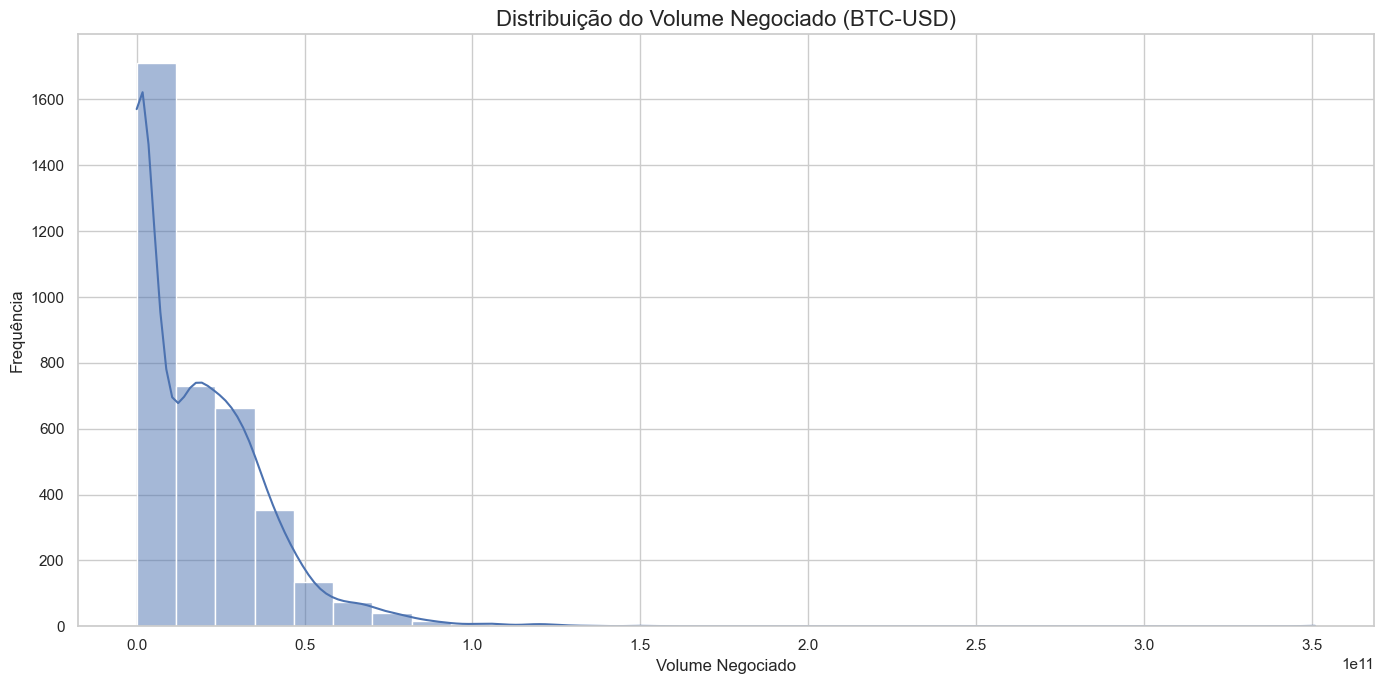

In [18]:
plt.figure(figsize=(14, 7))
sns.histplot(df['volume'], bins=30, kde=True)

# Configurações do gráfico
plt.title('Distribuição do Volume Negociado (BTC-USD)', fontsize=16)
plt.xlabel('Volume Negociado', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.tight_layout()

# Mostrar o gráfico
plt.show()

3. Gráfico de Barras: Preços de Alta e Baixa

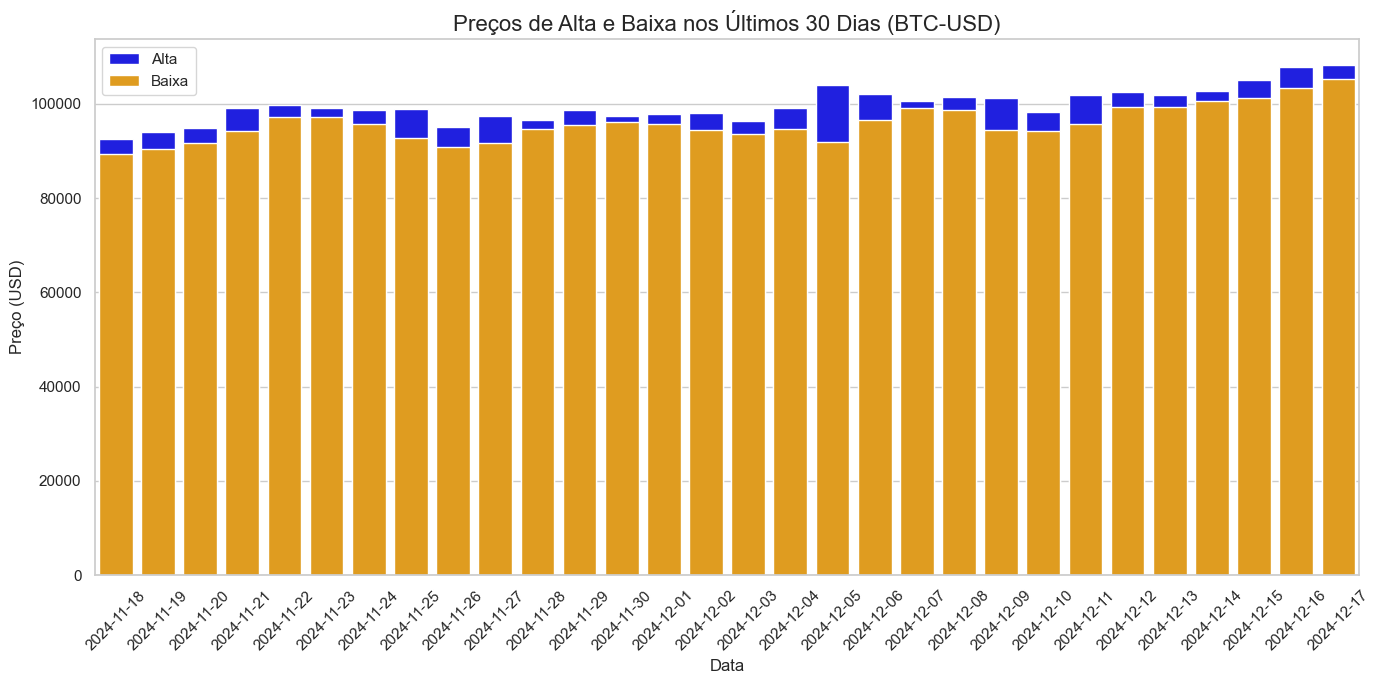

In [19]:
# Selecionar uma amostra de 30 dias
sample_df = df.sort_values(by='date').tail(30)

plt.figure(figsize=(14, 7))
sns.barplot(x='date', y='high_price', data=sample_df, color='blue', label='Alta')
sns.barplot(x='date', y='low_price', data=sample_df, color='orange', label='Baixa')

# Configurações do gráfico
plt.title('Preços de Alta e Baixa nos Últimos 30 Dias (BTC-USD)', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Preço (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Mostrar o gráfico
plt.show()

4. Gráfico de Linha: Comparação de Alta, Baixa e Fechamento

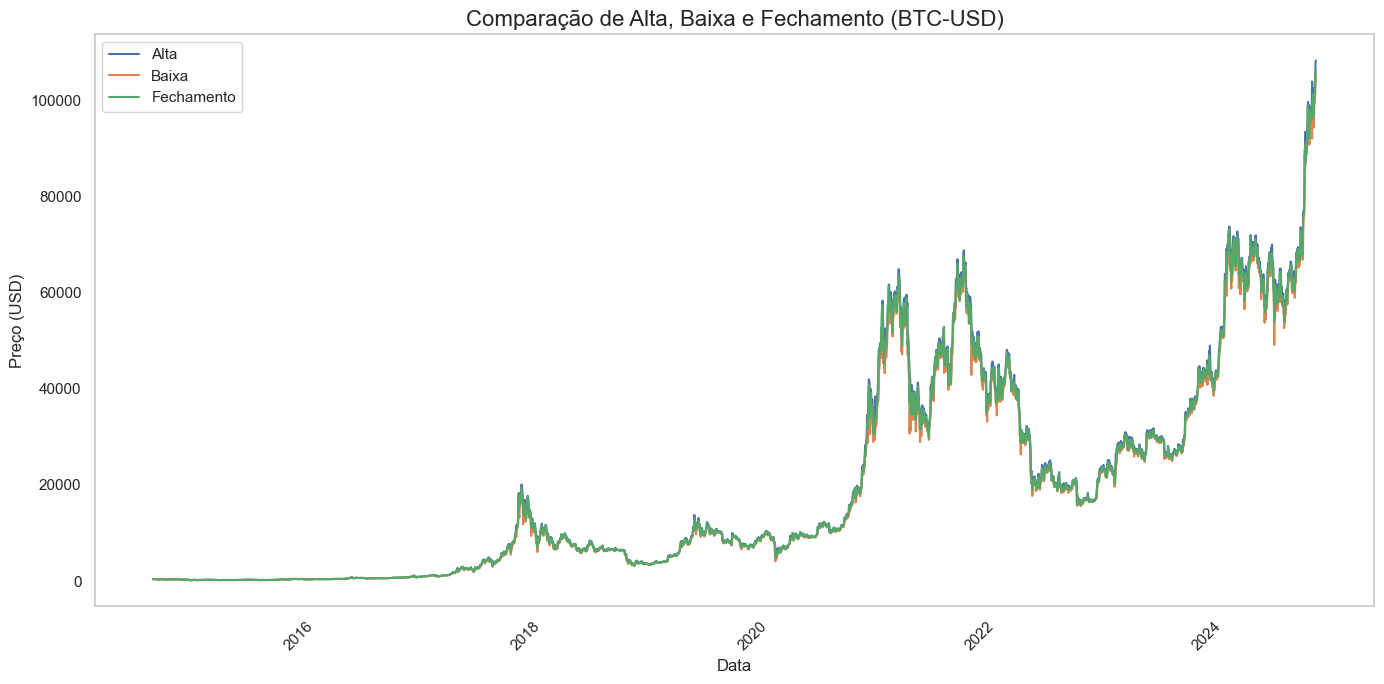

In [21]:
plt.figure(figsize=(14, 7))
sns.lineplot(x='date', y='high_price', data=df, label='Alta')
sns.lineplot(x='date', y='low_price', data=df, label='Baixa')
sns.lineplot(x='date', y='close_price', data=df, label='Fechamento')

# Configurações do gráfico
plt.title('Comparação de Alta, Baixa e Fechamento (BTC-USD)', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Preço (USD)', fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(False)

# Mostrar o gráfico
plt.show()


5. Calcular Médias Móveis

In [26]:
# Calcular a média móvel de 7 dias e 30 dias
df['MM_50'] = df['close_price'].rolling(window=50).mean()
df['MM_200'] = df['close_price'].rolling(window=200).mean()

# Visualizar as primeiras linhas com as médias móveis
df[['date', 'close_price', 'MM_7', 'MM_30']].head(15)

,date,close_price,MM_7,MM_30
0,2014-09-17,457.334015,NaN,NaN
1,2014-09-18,424.440002,NaN,NaN
2,2014-09-19,394.795990,NaN,NaN
3,2014-09-20,408.903992,NaN,NaN
4,2014-09-21,398.821014,NaN,NaN
5,2014-09-22,402.152008,NaN,NaN
6,2014-09-23,435.790985,417.462572,NaN
7,2014-09-24,423.204987,412.586997,NaN
8,2014-09-25,411.574005,410.748997,NaN
9,2014-09-26,404.424988,412.124568,NaN


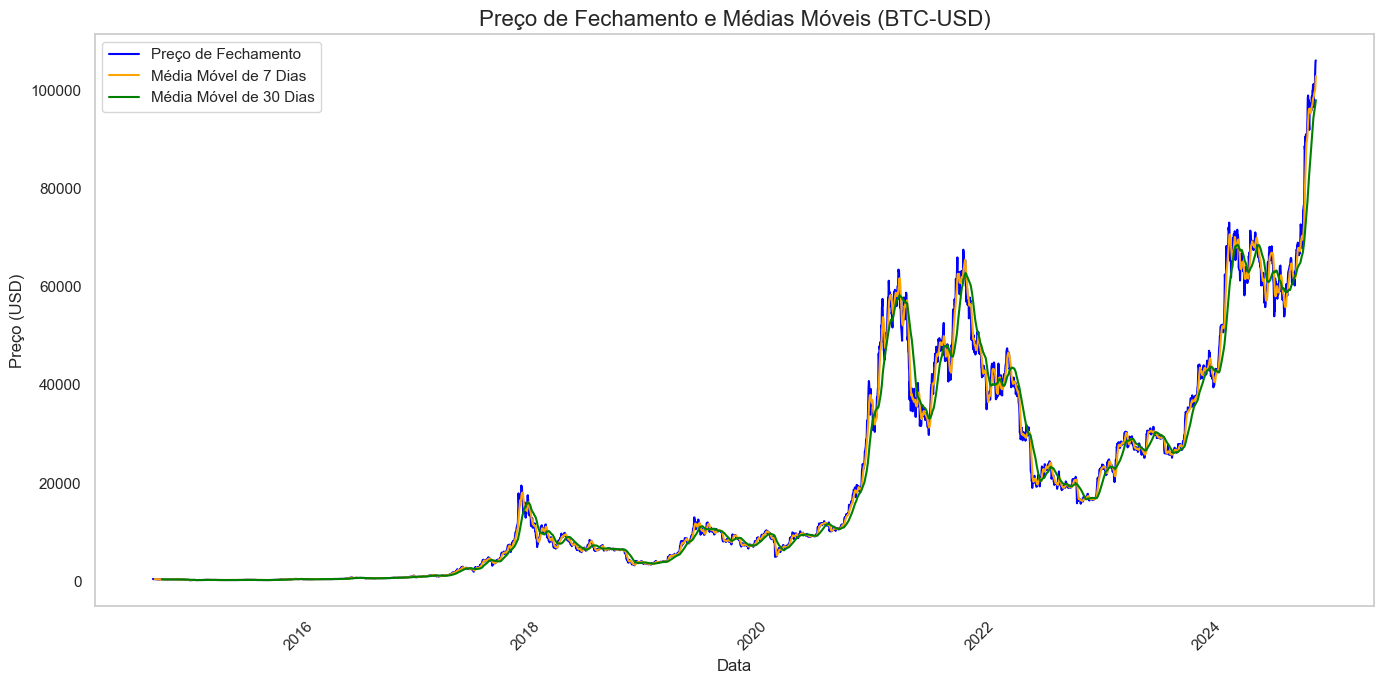

In [27]:
# Criar o gráfico
plt.figure(figsize=(14, 7))
sns.lineplot(x='date', y='close_price', data=df, label='Preço de Fechamento', color='blue')
sns.lineplot(x='date', y='MM_7', data=df, label='Média Móvel de 7 Dias', color='orange')
sns.lineplot(x='date', y='MM_30', data=df, label='Média Móvel de 30 Dias', color='green')

# Configurações do gráfico
plt.title('Preço de Fechamento e Médias Móveis (BTC-USD)', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Preço (USD)', fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(False)

# Mostrar o gráfico
plt.show()

**Análise:**

Usar um **gráfico com médias móveis** em análises financeiras é importante porque ele ajuda a identificar tendências de longo e curto prazo, eliminando o "ruído" dos movimentos diários nos preços. Aqui está uma explicação detalhada do **porquê** usar esse gráfico:


### **1. Suavização de Dados**
- O preço de um ativo como o Bitcoin pode variar significativamente de um dia para o outro, o que pode dificultar a identificação de tendências.
- As **médias móveis** suavizam essas flutuações, proporcionando uma visão mais clara da direção geral do mercado.
- Reflete as tendências mais recentes.
- Útil para traders que buscam movimentos rápidos no mercado.
- Mostra a direção geral do mercado ao longo de um período maior.
- Útil para investidores que querem entender o cenário macroeconômico ou a direção de longo prazo.
- Quando a média móvel de curto prazo cruza **acima** da média móvel de longo prazo, isso pode ser um sinal de **compra** (tendência de alta).
- Quando a média móvel de curto prazo cruza **abaixo** da média móvel de longo prazo, isso pode ser um sinal de **venda** (tendência de baixa).
- Gráficos de preços diários podem conter volatilidade que pode ser confusa.
- As médias móveis eliminam essas variações diárias insignificantes, permitindo decisões mais bem fundamentadas.

 **Resumo**

Usar médias móveis no gráfico é importante porque:

1. Facilita a **identificação de tendências.**
2. Ajuda a **suavizar flutuações** de preços.
3. Fornece **sinais de compra e venda**.
4. Oferece insights sobre o momento e a direção do mercado.

O gráfico com médias móveis é uma ferramenta essencial para traders e investidores porque combina simplicidade com eficiência em análises de tendência.

In [29]:
# Adicionar colunas de ano, mês e dia da semana
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['weekday'] = df['date'].dt.day_name()

# Visualizar as primeiras linhas
df[['date', 'close_price', 'year', 'month', 'weekday']].head()

,date,close_price,year,month,weekday
0,2014-09-17,457.334015,2014,9,Wednesday
1,2014-09-18,424.440002,2014,9,Thursday
2,2014-09-19,394.795990,2014,9,Friday
3,2014-09-20,408.903992,2014,9,Saturday
4,2014-09-21,398.821014,2014,9,Sunday


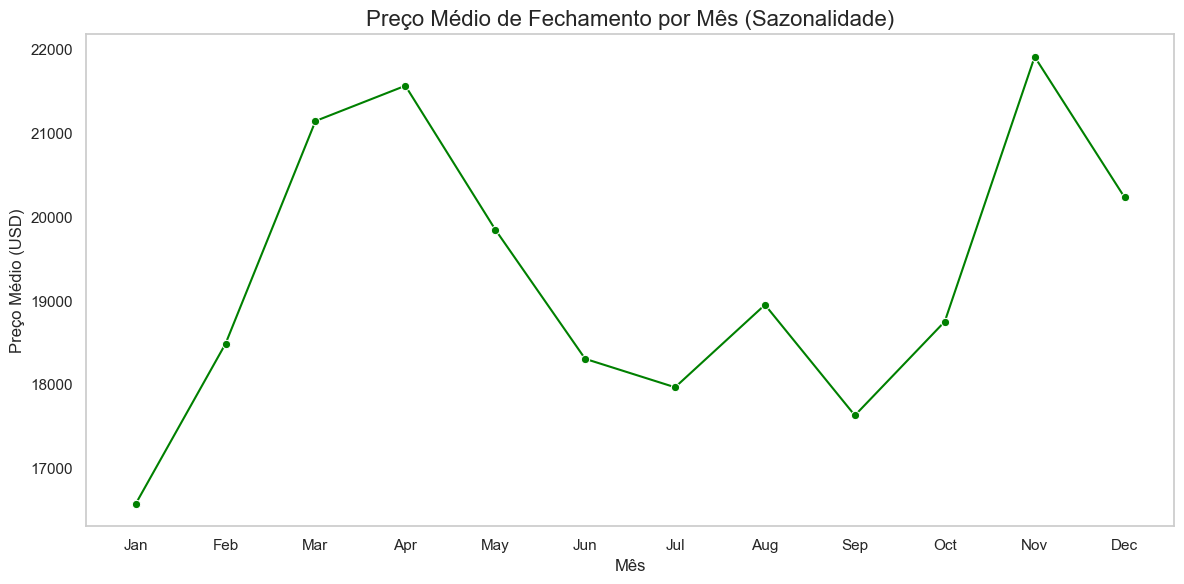

In [ ]:
# Um gráfico de linha mostrando a média dos preços de fechamento para cada mês.

# Calcular a média de preços por mês
monthly_data = df.groupby('month')['close_price'].mean().reset_index()

# Criar o gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='close_price', data=monthly_data, marker='o', color="green")

# Configurações do gráfico
plt.title('Preço Médio de Fechamento por Mês (Sazonalidade)', fontsize=16)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Preço Médio (USD)', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid()
plt.tight_layout()

# Mostrar o gráfico
plt.show()

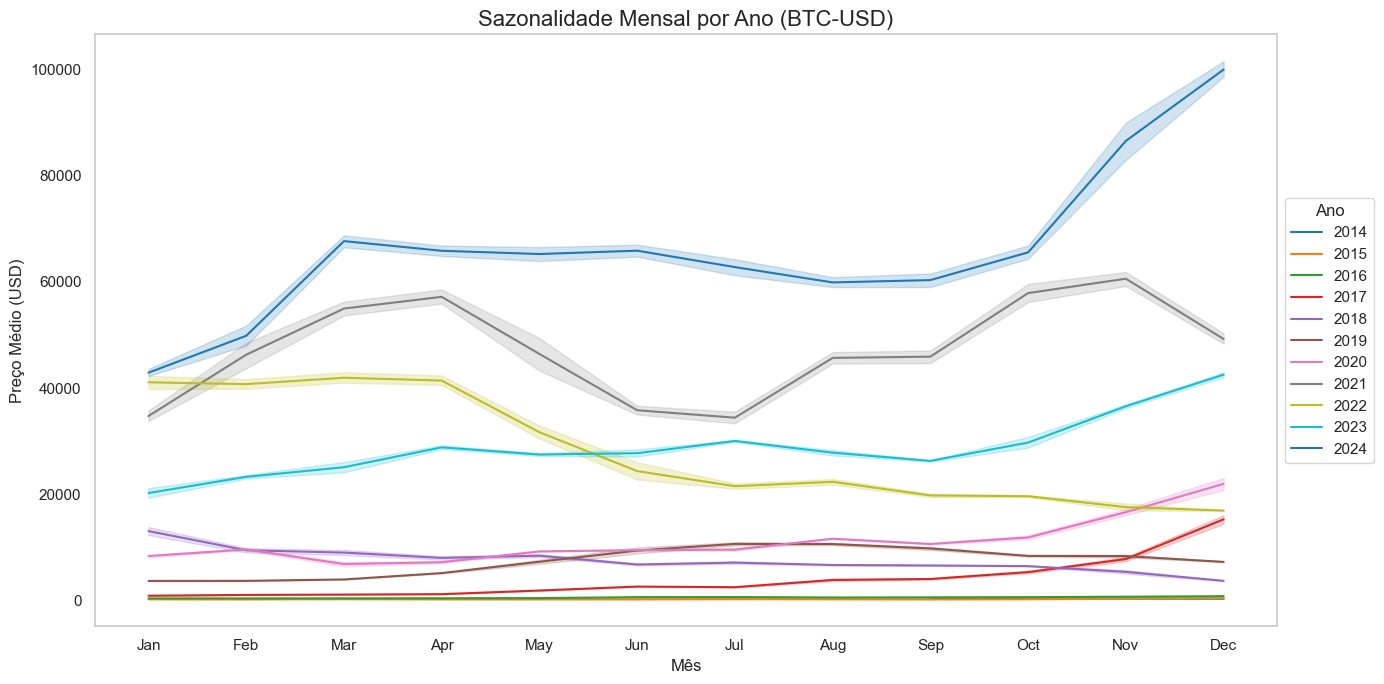

In [37]:
# Gráfico de Linha Analisando Sazonalidade Anual e Mensal

plt.figure(figsize=(14, 7))
sns.lineplot(x='month', y='close_price', hue='year', data=df, palette='tab10')

# Configurações do gráfico
plt.title('Sazonalidade Mensal por Ano (BTC-USD)', fontsize=16)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Preço Médio (USD)', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])

# Legenda posicionada ao lado direito
plt.legend(title='Ano', loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.tight_layout()

# Mostrar o gráfico
plt.show()

## Por que Analisar Sazonalidade?

**Padrões Recorrentes**

Descubra meses ou dias que apresentam maior volatilidade ou crescimento consistente.

Ex.: O preço do Bitcoin costuma ser mais volátil em meses específicos?

**Planejamento Estratégico**

Ajuda traders e investidores a ajustar suas estratégias com base em padrões históricos.

**Análise Comparativa**

Compare sazonalidades de diferentes anos para identificar mudanças no comportamento do mercado.

# Anomalias (outliers)

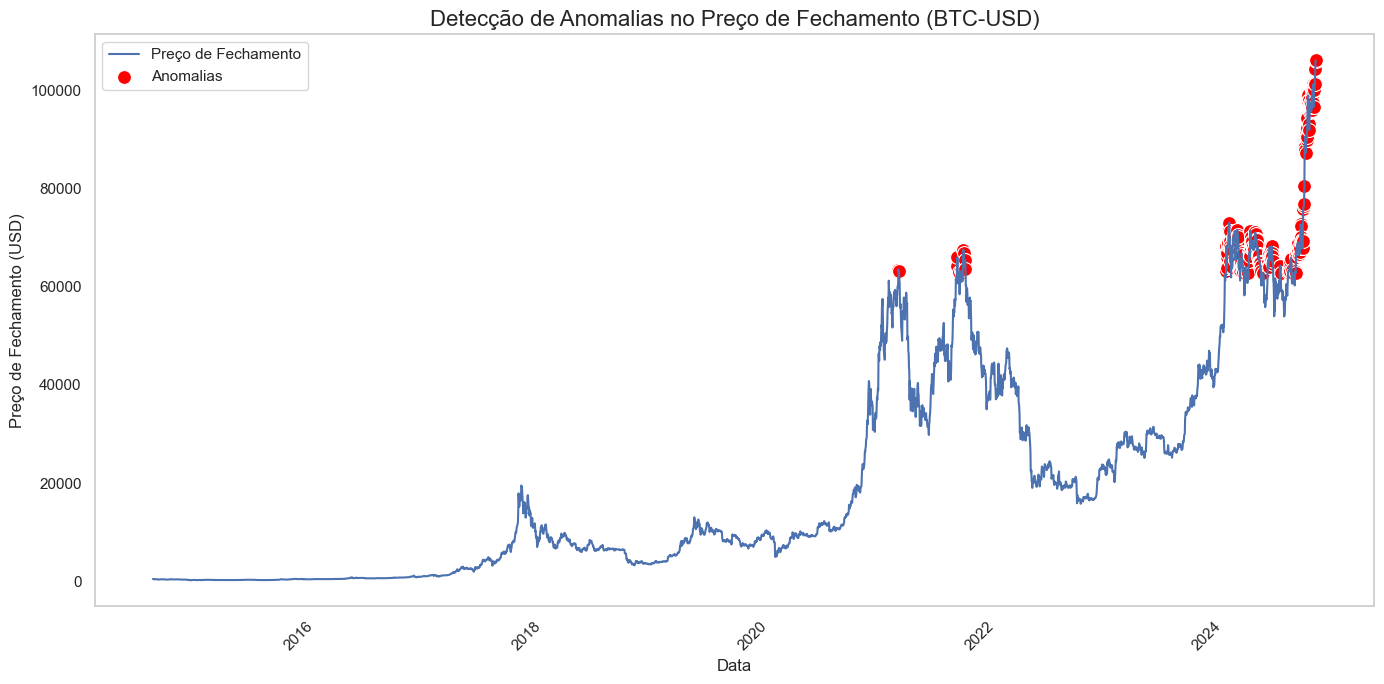

In [50]:
## Gráfico de Linha com Destaque para Outliers
# Podemos definir anomalias como pontos em que os preços estão significativamente fora da média ou mediana, 
# com base em um limiar como o desvio padrão.

# Calcular média e desvio padrão
mean_price = df['close_price'].mean()
std_price = df['close_price'].std()

# Definir anomalias como pontos fora de 2 desvios padrão
df['is_anomaly'] = np.abs(df['close_price'] - mean_price) > 2 * std_price

# Criar o gráfico
plt.figure(figsize=(14, 7))
sns.lineplot(x='date', y='close_price', data=df, label='Preço de Fechamento')
sns.scatterplot(x='date', y='close_price', data=df[df['is_anomaly']], color='red', label='Anomalias', s=100)

# Configurações do gráfico
plt.title('Detecção de Anomalias no Preço de Fechamento (BTC-USD)', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Preço de Fechamento (USD)', fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(False)

# Mostrar o gráfico
plt.show()

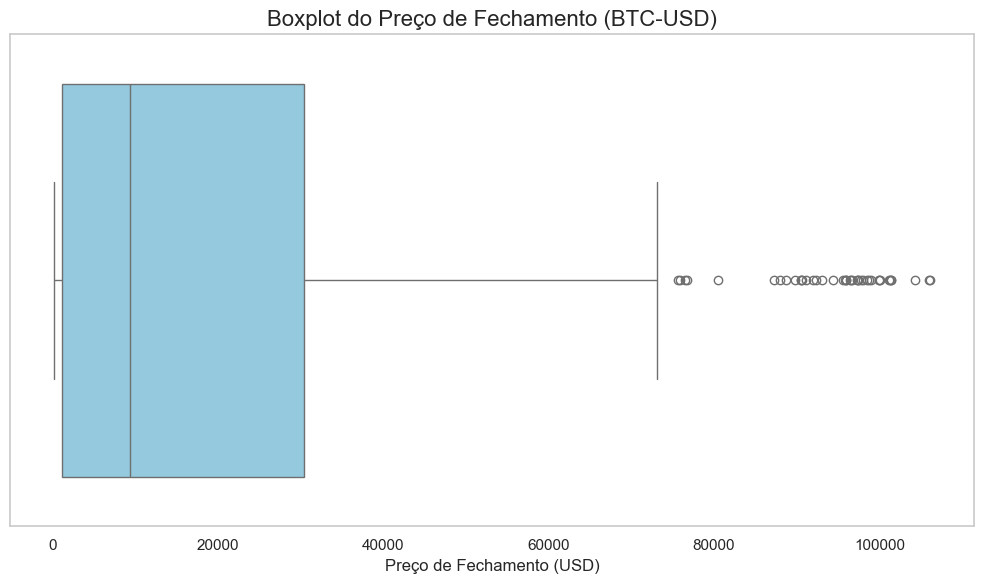

In [47]:
# Boxplot para Detectar Outliers
# Um boxplot ajuda a visualizar valores que estão além dos limites interquartílicos (IQR), frequentemente usados como um critério para anomalias.

plt.figure(figsize=(10, 6))
sns.boxplot(x='close_price', data=df, color='skyblue')

# Configurações do gráfico
plt.title('Boxplot do Preço de Fechamento (BTC-USD)', fontsize=16)
plt.xlabel('Preço de Fechamento (USD)', fontsize=12)
plt.tight_layout()
plt.grid(False)

# Mostrar o gráfico
plt.show()


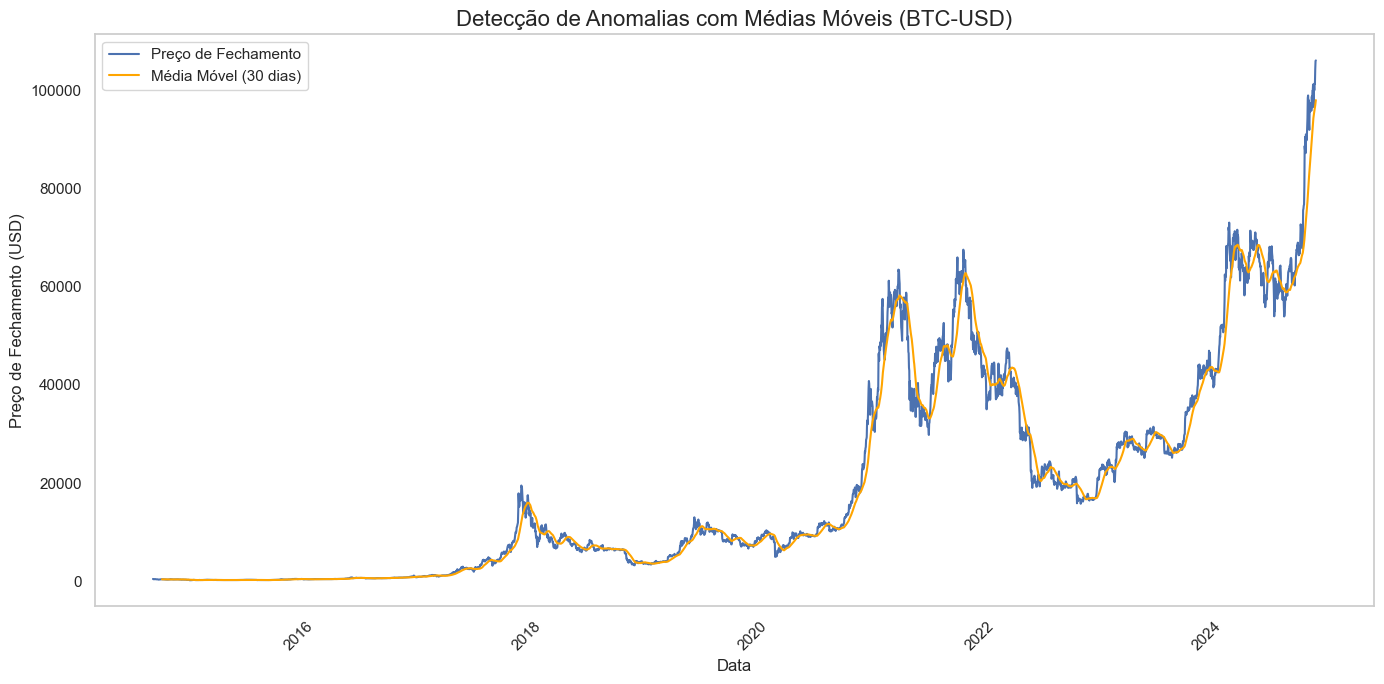

In [46]:
# 3. Gráfico de Linha com Médias Móveis para Detectar Quebras
# Diferença entre o preço de fechamento e uma média móvel para detectar anomalias.


# Calcular média móvel
df['MM_30'] = df['close_price'].rolling(window=30).mean()

# Detectar anomalias como desvios significativos da média móvel
df['is_anomaly'] = np.abs(df['close_price'] - df['MM_30']) > 2 * std_price

# Criar o gráfico
plt.figure(figsize=(14, 7))
sns.lineplot(x='date', y='close_price', data=df, label='Preço de Fechamento')
sns.lineplot(x='date', y='MM_30', data=df, label='Média Móvel (30 dias)', color='orange')
sns.scatterplot(
    x='date', y='close_price', 
    data=df[df['is_anomaly']], 
    color='red', label='Anomalias', s=50
)

# Configurações do gráfico
plt.title('Detecção de Anomalias com Médias Móveis (BTC-USD)', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Preço de Fechamento (USD)', fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(False)

# Mostrar o gráfico
plt.show()


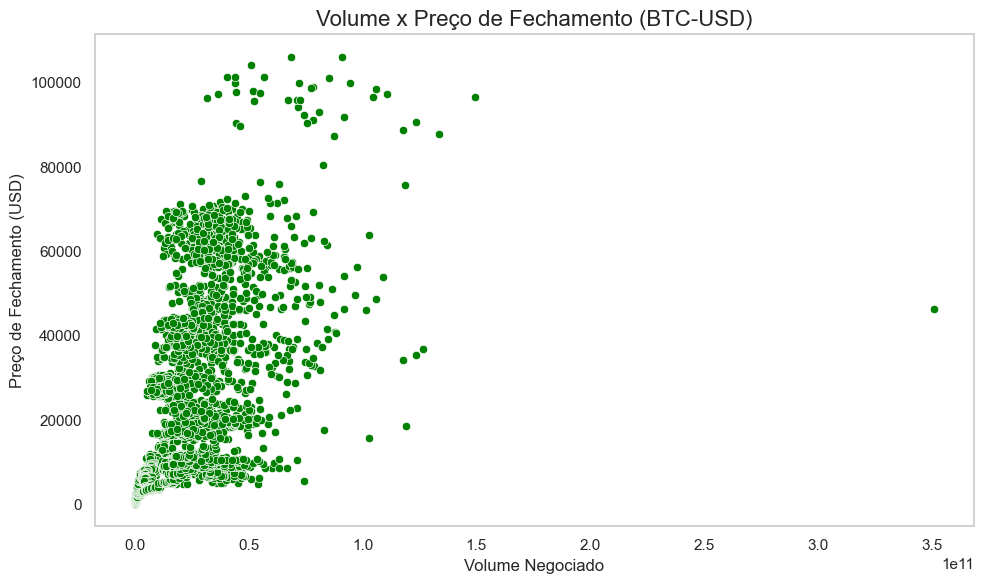

In [45]:
# Gráfico de Dispersão para Relação Volume x Preço
# Outliers no volume negociado também podem indicar anomalias.

plt.figure(figsize=(10, 6))
sns.scatterplot(x='volume', y='close_price', data=df, color="green")

# Configurações do gráfico
plt.title('Volume x Preço de Fechamento (BTC-USD)', fontsize=16)
plt.xlabel('Volume Negociado', fontsize=12)
plt.ylabel('Preço de Fechamento (USD)', fontsize=12)
plt.tight_layout()
plt.grid(False)

# Mostrar o gráfico
plt.show()

**Análise:** Pontos distantes do padrão geral podem indicar volumes anormais em relação ao preço.

Por que usar esses gráficos para anomalias?

1. Gráficos de linha com destaque para outliers ajudam a identificar quebras inesperadas.

2. Boxplots mostram valores extremos com base em limites estatísticos.

3. Médias móveis ajudam a comparar os preços reais com uma linha de tendência, destacando desvios anormais.

4. Gráficos de dispersão identificam relações incomuns entre variáveis, como volume e preço.

A análise de outliers é uma etapa crucial para melhorar a qualidade da base de dados, garantindo que os dados utilizados nas próximas etapas sejam mais consistentes e representativos. Após identificar e analisar os outliers, é possível decidir se eles devem ser excluídos ou tratados de outra forma, dependendo do impacto que exercem na análise. Na sequência, aplicaremos o teste de Dickey-Fuller, ou outro teste de estacionariedade adequado, para verificar se a série temporal é estacionária. Essa verificação é essencial, pois muitos modelos de séries temporais assumem estacionariedade para produzir previsões precisas. Caso a série não seja estacionária, serão realizadas transformações, como diferenciação, para ajustá-la.

Com a série preparada, avançamos para a etapa de modelagem. Modelos de séries temporais como ARIMA (AutoRegressive Integrated Moving Average), SARIMA (Seasonal ARIMA) e Redes Neurais Recorrentes (RNN) serão testados para identificar aquele que melhor se adapta ao comportamento dos dados. O objetivo é capturar padrões temporais e sazonais que possam ser úteis para previsões futuras. Por fim, utilizaremos modelos adicionais, como Random Forest e outras técnicas avançadas de aprendizado de máquina, para gerar previsões das moedas com alta precisão. Os resultados obtidos serão avaliados para garantir sua confiabilidade, e, caso necessário, ajustes serão realizados no pipeline de análise. A previsão final será documentada e servirá como base para decisões estratégicas.